# The Role of Metabolic Strategies in Determining Microbial Community Richness along Temperature Gradients

Danica Duan  
Tom Clegg, Tom Smith, Samraat Pawar

## The microbial community model

The Microbial Community Model (MiCRM) is a MacArthur-style consumer-resource model [(MacArthur 1970)](https://www.sciencedirect.com/science/article/pii/0040580970900390) which tracks the carbon flow within a bacterial community, where N species of heterotrophic mesophilic bacteria consumers compete for M types of resources. The biomass dynamic of species $i$ and resource dynamic of resource $\alpha$ is given by:


\begin{align}\label{eq:community}
\frac{dC_i}{dt} = C_i\Bigl(\sum_{\alpha=1}^{M}u_{i\alpha}(T)S_\alpha(1-\sum_{\beta=1}^{M}l_{\alpha \beta}) - m_i(T)\Bigl), \\
\frac{dS_\alpha}{dt} = \rho_\alpha - \sum_{i=1}^{N}\Bigl(C_iu_{i\alpha}(T)S_\alpha-\sum_{\beta=1}^{M}C_iu_{i\beta}(T)S_\beta l_{\beta \alpha}\Bigl).
\end{align}

(Type 2: Monod equation
\begin{equation}
Mo = \frac{S_\alpha}{K_\alpha + S_\alpha}
\end{equation})




| Parameter symbol | Parameter name | Units |
|---|---|---|
| $M$ | Number of resources | individual |
| $N$ | Number of species | individual |
| $C_i$ | Bacteria population of species i | mass/volume |
| $S_\alpha$ | Concentration of resource $\alpha$ | mass/volume |
| $K_\alpha$ | Half saturation constant | mass/volume |
| $u_{i\alpha}$ | Uptake of resource $\alpha$ by species $i$ | volume/(mass*time) |
| $m_i$ | Respiration of species i | 1/time |
| $l_{\alpha \beta}$ | Leakage: proportion of resource $\alpha$ converted to resource $\beta$ | fraction |
| $\rho_\alpha$ | Supply of resource $\alpha$ | mass/volume | 

### Vectorized model
The consumer and resource dynamics in the simulation is calculated using the vectorized version of equations 1 & 2 for computing efficiency: 

\begin{equation}
d\mathbf{C}/dt = diag(\mathbf{C}) \circ ((1-l) \mathbf{U} \cdot \mathbf{S} - \mathbf{m})
\end{equation}

\begin{equation}
d\mathbf{S}/dt = \mathbf{\rho} - diag(\mathbf{S})\cdot \mathbf{U}^T \cdot \mathbf{C} + (\mathbf{U} \cdot diag(\mathbf{S}) \cdot \mathbf{l})^T \cdot \mathbf{C}
\end{equation}


In these equations, $\mathbf{C}$ and $\mathbf{S}$ are single row matrices of consumer and resource concentration at each time point. $\mathbf{U}$ is the N $\times$ M matrix of species uptake rate, $\mathbf{m}$ is the single row matrix of species respiration rate with the length of N. $\mathbf{l}$ is the M $\times$ M leakage matrix for M resources, and l is the set leakage fraction of resources. "$\circ$" denotes the element wise product of two matrices, "$\cdot$" represents matrix multiplication, and "T" is the transpose of matrix. $diag(\mathbf{S})$ is setting the resource concentration at each time point onto the diagonal of M $\times$ M matix with the rest of the elements being 0, which notation makes the calculation equivalent to calculating row-wise products of $\mathbf{U}$ and $\mathbf{S}$. 

## Temperature and size dependencies

The uptake and respiration rates in the model are considered size and temperature dependent following the Metabolic Theory of Ecology and a modified version of the Schoolfield equation ([Kontopoulos et al., 2020](https://onlinelibrary.wiley.com/doi/full/10.1111/evo.13946)), assuming both metabolic rates are controlled by single enzymes whose reaction rates are deteremined by temperature, and deactivate outside operational temperature range. 

Temperature and size dependencies for resource uptake (u) and maintenance respiration (m): 

\begin{equation}
B_i = \frac{B_0 \times e^{\frac{-E}{k}\cdot\Bigl(\frac{1}{T} - \frac{1}{T_{ref}}\Bigl)}}{1 + \frac{E}{E_D-E}e^{\frac{E_D}{k}\cdot(\frac{1}{T_{pk}}-\frac{1}{T_{ref}})}}
\end{equation}

| Parameter symbol | Parameter name | Units |
|---|---|---|
| $B$ | Normalisation constant | - |
| $E$ | Activation energy | eV |
| $k$ | Boltsmann constant | eV/K |
| $T$ | Temperature | K |
| $T_{ref}$| Reference temperature | K |
| $E_D$ | High temperature deactivation energy | eV |
| $T_{pk}$ | Temperature of peak rate | K |

Note that the parameters values for these equations are given according to [Smith et al. (2019)](https://www.nature.com/articles/s41467-019-13109-1), assuming that resource uptake follows a similar temperature dependency curve with bacterial growth rate. All temperature terms are in the unit of Kelvin(K). 

In these equations, k is the Boltsmann constant, $8.617 \times 10^{−5} eV K^{−1}$. T is the model temperature and $T_{ref}$ is the reference temperature. $T_{pk}$ is the temperature for highest metabolic rates and also is the deactivation temperature for related enzyme, $T_{pk}$ for uptake is sampled from a normal distribution with mean value at 308.15 K, and 3 degrees higher for respiration. $E_a$ values are the activation energies, sampled from beta distributions with median values of 0.82 ev and 0.67 ev for uptake and respiration. $E_D$ values are the deactivation energies, set to 3.5 eV for all reactions. $U_0$ and $R_0$ are the uptake and respiration rates at reference temperatures.


### The effective LV model

Following paper (A Minimal Model...)

Assuming resource dynamics reaches equilibrium faster than species biomass. When $dS_\alpha/dt = 0$, get equilibrium resource concentration $\hat{S_\alpha}$ as a function of $C_j$ ($\hat{S_\alpha}(\{C_j\})$).

Inserting $\hat{S_\alpha}(\{C_j\})$ in to biomass dynamics, then approximate around $C_j = \hat{C_j}$ using the first order of Taylor expansion: 

\begin{align*}
\frac{dC_i}{dt} & = C_i \left(\sum_\alpha u_{i\alpha}(1-l_\alpha)\hat{S_\alpha}(\{C_j\}) - m_i\right) \\
& \approx C_i \Bigl[\sum_\alpha u_{i\alpha}(1-l_\alpha) \left(\hat{S_\alpha} + \sum_j \frac{\partial \hat{S_\alpha}}{\partial C_j}(C_j - \hat{C_j}) \right) - m_i\Bigl] \\
& = C_i(r_i+\sum_j \alpha_{ij}C_j)
\end{align*}

Where
\begin{align}
& \alpha_{ij} = \sum_\alpha u_{i\alpha}(1 - l_\alpha)\frac{\partial \hat{S_\alpha}}{\partial C_j} \\
& r_i = \sum_\alpha u_{i\alpha}(1-l_\alpha)\hat{S_\alpha} -\sum_j \alpha_{ij} \hat{C_j} - m_i
\end{align}


When resources are at equilibrium, writing the equation into a compact version as: 
\begin{equation*}
\rho_\alpha - \sum_{j\beta} C_ju_{j\beta}\hat{S_\beta}(\delta_{\beta \alpha} - l_{\beta \alpha}) = 0
\end{equation*}


In which $\delta_{\alpha \beta}$ is a Kronecker delta, meaning that: 
\begin{equation*}
\delta_{\alpha \beta} = 
\begin{cases}
0,& \text{if } \alpha \neq \beta\\
1,& \text{if } \alpha =\beta
\end{cases}
\end{equation*}


Taking partial derivative $\frac{\partial \hat{S}}{\partial C_j}$ of the above equation, then rearrange :
\begin{equation*}
\sum_{j\beta}(\delta_{\beta \alpha} - l_{\beta \alpha})C_ju_{j\beta} \frac{\partial \hat{S_{\beta}}}{\partial C_j} = -\sum_\beta (\delta_{\beta \alpha} - l_{\beta \alpha})u_{j\beta}\hat{S_\beta}
\end{equation*}

Then asign $L_{\beta \alpha} = \delta_{\beta \alpha} - l_{\beta \alpha}$ and $A_{\alpha \beta} = \sum_i L_{\beta \alpha} C_i u_{i\beta}$ to the above equation, getting: 
\begin{equation}
\sum_{\beta} A_{\alpha \beta} \frac{\partial \hat{S_{\beta}}}{\partial C_j} = - \sum_\beta L_{\beta \alpha}u_{j\beta}\hat{S_\beta}
\end{equation}

Writing into a vectorized version: 
\begin{equation*}
\mathbf{A} \cdot \vec{\frac{\partial \hat{S}}{\partial C_j}} = - \mathbf{L} \cdot \vec{\mathbf{US}}
\end{equation*}

which can be rearranged into: 
\begin{equation}
\vec{\frac{\partial \hat{S}}{\partial C_j}} = - \mathbf{A}^{-1} \cdot \mathbf{L} \cdot \vec{\mathbf{US}}
\end{equation}

\begin{align*}
\frac{\partial \hat{S}}{\partial C_j} &= -\begin{bmatrix}
A_{11}^{-1} & \dots & A_{1M}^{-1} \\
\vdots & \ddots & \\
A_{M1}^{-1} & \dots & A_{MM}^{-1}
\end{bmatrix}
\begin{bmatrix}
L_{11} & \dots & L_{M1} \\
\vdots & \ddots & \\
L_{1M} & \dots & L_{MM} 
\end{bmatrix}
\begin{bmatrix}
u_{j1}\hat{S_1} \\
\vdots \\
u_{jM}\hat{S_M}
\end{bmatrix} \\
& = -\begin{bmatrix}
A_{11}^{-1} & \dots & A_{1M}^{-1} \\
\vdots & \ddots & \\
A_{M1}^{-1} & \dots & A_{MM}^{-1}
\end{bmatrix} 
\begin{bmatrix}
\sum_\gamma L_{\gamma 1}u_{j\gamma}\hat{S_\gamma} \\
\vdots \\
\sum_\gamma L_{\gamma M}u_{j\gamma}\hat{S_\gamma}
\end{bmatrix} \\
& = -\begin{bmatrix}
\sum_{\beta \gamma}A_{1\beta }^{-1} L_{\gamma \beta}u_{j\gamma}\hat{S_\gamma} \\
\vdots \\
\sum_{\beta \gamma}A_{M\beta }^{-1} L_{\gamma \beta}u_{j\gamma}\hat{S_\gamma}
\end{bmatrix}
\end{align*}

Therefore for each $S_\alpha$, there is: 
\begin{equation}
\frac{\partial \hat{S_{\alpha}}}{\partial C_j} = -\sum_{\beta \gamma} A_{\alpha\beta}^{-1} L_{\gamma \beta} u_{j \gamma} \hat{S_\gamma}
\end{equation}

Inserting this back into equation 9 for the interaction coefficient: 
\begin{align}
\alpha_{ij} &= \sum_\alpha u_{i \alpha}(1-l_\alpha)\frac{\partial \hat{S_\alpha}}{\partial C_j} \nonumber \\
& = \sum_\alpha u_{i \alpha}(1-l_\alpha)(-\sum_{\gamma \beta}A_{\alpha \gamma}^{-1} L_{\beta \gamma} u_{j\beta} \hat{S_\beta}) \\
&= -\sum_{\alpha\beta} u_{i \alpha}(1-l_\alpha) W_{\alpha\beta}u_{j\beta}
\end{align}

Where $ W_{\alpha\beta} = \sum_\gamma A_{\alpha \gamma}^{-1} L_{\beta \gamma} \hat{S_\beta}$ .

## Assembly simulation

The simulation for community assemblies is run on Python. 

For each assembly, I start the system with a random pool of 100 species competing for 50 resources, then run the selection process by integrating the concentration dynamics differential equation of species and resources (equation 1 and 2). The running time is set to 4000 for all systems to reach steady state ($dC_i/dt = 0$ and $dS_j/dt = 0$), with a constant flux of externally supply of resource at each time point ($\rho_j = 1$). The initial biomass concentration for each species is 0.1 g/mL and the initial resource concentration for each resource is 1 g/mL. 

Cross-feeding is modelled through the leakage-transformation matrix. Reference temperature for the temperature dependences of both metabolic traits are set to 0 &deg;C. 

For each invation event of the community, all extinct species (with biomass < 0.01 g/mL) are replaced with randomly generated new species, then the system is run to reach a new equilibrium. The invation events are performed for a set number of times inside one assembly. 

## Calculation for CUE
##### Literature notes

| Mathmetical approach | Notes | ref |
|---|---|---|
| $\frac{U-R}{U}$| Uptake and Respiration | [1](https://nph.onlinelibrary.wiley.com/doi/pdfdirect/10.1111/j.1469-8137.2012.04225.x),[9](https://www.sciencedirect.com/science/article/pii/S0038071711002112)|
|$\frac{GR}{GR+RR}$| Growth rate and respiration rate |[1](https://nph.onlinelibrary.wiley.com/doi/pdfdirect/10.1111/j.1469-8137.2012.04225.x),[6](https://academic.oup.com/femsec/article/73/3/430/528718) |
|  |
| $\frac{\Delta C_S-R_{cum}}{\Delta C_S}$ | Decrease in substrate concentration and culmulative respiration| [1](https://nph.onlinelibrary.wiley.com/doi/pdfdirect/10.1111/j.1469-8137.2012.04225.x),[8](https://www.sciencedirect.com/science/article/pii/S0038071711001787)|
| $\frac{\Delta C_B}{\Delta C_B+R_{cum}}$ | Increase in biomass and culmulative respiration| [1](https://nph.onlinelibrary.wiley.com/doi/pdfdirect/10.1111/j.1469-8137.2012.04225.x),[2](https://www.sciencedirect.com/science/article/pii/S0038071716300165),[3](http://www.soest.hawaii.edu/oceanography/courses/OCN626/BGE_annrev.pdf),[4](https://www.sciencedirect.com/science/article/pii/S0038071716000316),[5](https://onlinelibrary.wiley.com/doi/abs/10.1111/gcb.12036),[7](https://esajournals.onlinelibrary.wiley.com/doi/full/10.1890/15-2110.1)|


Microbial growth: rates of biomass increase, protein synthesis, DNA replication, or consumption of $^{13}C$‐labeled substrates. [7](https://esajournals.onlinelibrary.wiley.com/doi/full/10.1890/15-2110.1)

Respiration: rates of total $CO_2$ efflux, $^{13}CO_2$ efflux from labeled substrates, oxygen consumption, or respiratory electron transport. [7](https://esajournals.onlinelibrary.wiley.com/doi/full/10.1890/15-2110.1)

$ U = G + R $ [3](http://www.soest.hawaii.edu/oceanography/courses/OCN626/BGE_annrev.pdf),[4](https://www.sciencedirect.com/science/article/pii/S0038071716000316); metabolic tracer [9](https://www.sciencedirect.com/science/article/pii/S0038071711002112)


CUE estimation under steady state conditions, the efficiency of microbial metabolism(maintenance): $\frac{R}{U}$ [10](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0093282)

Population, community and ecosystem-scale CUE ([Fig.2](https://link.springer.com/article/10.1007/s10533-016-0191-y/figures/2)) [11](https://link.springer.com/article/10.1007/s10533-016-0191-y)

##### Calculation

We consider CUE as an intrinsic value for each species, encoded in the species' preference for uptake, leakage and transformation ability of carbon source, and maintenance respiration required for survival. These CUE values are then selected during assembly. 

The intrinsic CUE value of species i is calculated with a common CUE calculation method using $\frac{\text{Carbon Gain} - \text {Carbon Loss}}{\text{Carbon Gain}}$ [(Manzoni et al. 2012)](https://nph.onlinelibrary.wiley.com/doi/pdfdirect/10.1111/j.1469-8137.2012.04225.x):
\begin{equation}
CUE_i = \frac{\sum\limits _{j=1}^{M}U_{ij}S_0(1-\sum\limits_{k=1}^{M}l_{jk}) - R_i}{\sum\limits _{j=1}^{M}U_{ij}S_0}
\end{equation}

$S_0$ here is the initial resource concentration at the beginning of the assembly, which is 1 g/mL. 

According to [Smith et al. (2020)](https://www.biorxiv.org/content/10.1101/2020.09.14.296095v1), the temperature response of CUE for organisms within the operational temperature range (OTR) has the form of the Boltzmann-Arrhenius equation. Here I give a similar calculation process of the intrinsic CUE based on equation(5), assuming the exponential increase of metabolic rates with temperature is equivalent to the Boltzmann-Arrhenius equation.

\begin{equation}
CUE = \frac{U_0e^{\frac{-Ea_U}{k}\cdot\Bigl(\frac{1}{T} - \frac{1}{T_{ref}}\Bigl)} (1-l) - R_0e^{\frac{-Ea_R}{k}\cdot\Bigl(\frac{1}{T} - \frac{1}{T_{ref}}\Bigl)}}{U_0e^{\frac{-Ea_U}{k}\cdot\Bigl(\frac{1}{T} - \frac{1}{T_{ref}}\Bigl)}}
\end{equation}

The species CUE value at reference temperature ($T = T_{ref}$):
\begin{equation}
CUE_0 = \frac{U_0(1 - l) - R_0}{U_0}
\end{equation}

If we take a log form of equation(6), and assign $\Delta T = \frac{1}{k}\Bigl(\frac{1}{T} - \frac{1}{T_{ref}}\Bigl) \rightarrow 0$, then we can calculate the approximation of CUE as the first-order Taylor expression: 

\begin{equation}
lnCUE = ln(U(1-l) - R) - lnU \approx ln(U_0(1-l) - R_0) - lnU_0 + \bigl(\frac{R_0E_R - R_0E_U}{U_0(1-l)-R_0}\bigl)\Delta T
\end{equation}

Which equation has the form of an Arrhenius equation, so if we take $CUE_0$ out of the equation, we can see the activation energy of CUE as: 

\begin{equation}
Ea_{CUE} = \frac{R_0(E_U - E_R)}{U_0(1-l) - R_0}
\end{equation}


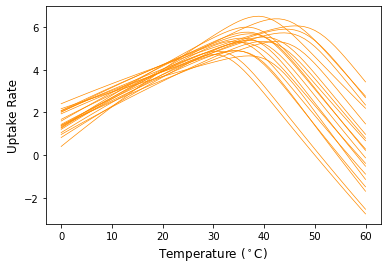

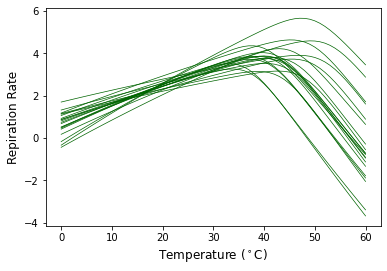

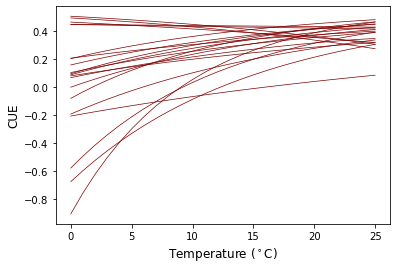

In [12]:
import numpy as np
import matplotlib.pyplot as plt

N = 20
k = 0.0000862 # Boltzman constant
Tref = 273.15 + 10 # Reference temperature Kelvin, 0 degrees C
T = 273.15 + np.linspace(0,60,61) # Temperatures
Ea_D = 3.5
lf = 0.4

rho_R = -0.75
rho_U = -0.75

B_R0 = np.log(1.70 * np.exp((-0.67/k) * ((1/Tref)-(1/273.15)))/(1 + (0.67/(Ea_D - 0.67)) * np.exp(Ea_D/k * (1/311.15 - 1/Tref)))) # Using CUE0 = 0.22, mean growth rate = 0.48
B_R0_var = 0.05* B_R0
Ea_R_mean = 0.67; Ea_R_var = 0.04*Ea_R_mean
cov_xy_R = rho_R * B_R0_var**0.5 * Ea_R_var ** 0.5
mean_R = [B_R0, Ea_R_mean]
cov_R = [[B_R0_var, cov_xy_R], [cov_xy_R, Ea_R_var]]  

B_U0 = np.log((1.70/(1 - lf - 0.22)) * np.exp((-0.82/k) * ((1/Tref)-(1/273.15)))/(1 + (0.82/(Ea_D - 0.82)) * np.exp(Ea_D/k * (1/308.15 - 1/Tref))))
B_U0_var = 0.05* B_U0
Ea_U_mean = 0.82; Ea_U_var = (0.04*Ea_U_mean)
cov_xy_U = rho_U * B_U0_var**0.5 * Ea_U_var ** 0.5
mean_U = [B_U0, Ea_U_mean]
cov_U = [[B_U0_var, cov_xy_U], [cov_xy_U, Ea_U_var]]  


np.random.seed(0)
T_pk_U = 273.15 + np.random.normal(35, 5, size = N); T_pk_R = T_pk_U + 3
B_R_log, Ea_R = np.random.multivariate_normal(mean_R, cov_R, N).T
B_U_log, Ea_U = np.random.multivariate_normal(mean_U, cov_U, N).T
B_R = np.exp(B_R_log); B_U = np.exp(B_U_log)


for i in range(N):
    U_Sharpe = B_U[i] * np.exp((-Ea_U[i]/k) * ((1/T)-(1/Tref)))/(1 + (Ea_U[i]/(Ea_D - Ea_U[i])) * np.exp(Ea_D/k * (1/T_pk_U[i] - 1/T))) 
    plt.plot(T - 273.15, np.log(U_Sharpe), color = 'darkorange', linewidth=0.7)

plt.xlabel('Temperature ($^\circ$C)', fontsize = 12) 
plt.ylabel('Uptake Rate', fontsize = 12)
plt.show()

for i in range(N):
    R_Sharpe = B_R[i] * np.exp((-Ea_R[i]/k) * ((1/T)-(1/Tref)))/(1 + (Ea_R[i]/(Ea_D - Ea_R[i])) * np.exp(Ea_D/k * (1/T_pk_R[i] - 1/T))) 
    plt.plot(T - 273.15, np.log(R_Sharpe), 'darkgreen', linewidth=0.7)

plt.xlabel('Temperature ($^\circ$C)', fontsize = 12) 
plt.ylabel('Repiration Rate', fontsize = 12)
plt.show()

T = T[0:26]
for i in range(N):
    U_Sharpe = B_U[i] * np.exp((-Ea_U[i]/k) * ((1/T)-(1/Tref)))/(1 + (Ea_U[i]/(Ea_D - Ea_U[i])) * np.exp(Ea_D/k * (1/T_pk_U[i] - 1/T))) 
    R_Sharpe = B_R[i] * np.exp((-Ea_R[i]/k) * ((1/T)-(1/Tref)))/(1 + (Ea_R[i]/(Ea_D - Ea_R[i])) * np.exp(Ea_D/k * (1/T_pk_R[i] - 1/T))) 
    plt.plot(T - 273.15, (U_Sharpe*(1-lf) - R_Sharpe)/U_Sharpe, color = 'maroon', linewidth=0.7)

plt.xlabel('Temperature ($^\circ$C)', fontsize = 12) 
plt.ylabel('CUE', fontsize = 12)
plt.show()


### Type I


#### 1 consumer, 1 resource, 25C

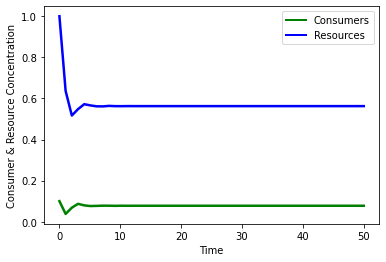

In [7]:
from Bacteria_vector_modular import ass_temp_run
import matplotlib.pylab as plt
from matplotlib.lines import Line2D
import numpy as np

########## Setting Parameters ###########
N = 1 # Number of consumers
M = 1 # Number of resources

# Temperature params
T = 273.15 + 25 # Temperature
Tref = 273.15 + 0 # Reference temperature Kelvin
Ma = 1 # Mass
Ea_D = 3.5 # Deactivation energy - only used if use Sharpe-Schoolfield temp-dependance
lf = 0.4 # Leakage
p_value = 1 # External input resource concentration
# covariance of B and Ea, abs(rho)<=1
rho_R = 1
rho_U = 1

# Assembly
ass = 1 # Assembly number, i.e. how many times the system can assemble
t_fin = 50 # Number of time steps
typ = 1 # Functional response, Type I or II
K = 5 # Half saturation constant

result_array = ass_temp_run(t_fin, N, M, T, Tref, Ma, ass, Ea_D, lf, p_value, typ, K, rho_R, rho_U)[0]

t_plot = np.linspace(0,len(result_array),len(result_array))

plt.plot(t_plot, result_array[:,N:N+M], 'b-', linewidth=2.5, label = "Resources")
plt.plot(t_plot, result_array[:,0:N], 'g-', linewidth=2.5, label = "Consumers")
plt.ylabel('Consumer & Resource Concentration')
plt.xlabel('Time')
plt.legend([Line2D([0], [0], color='green', lw=2), Line2D([0], [0], color='blue', lw=2)], ['Consumers', 'Resources'])
plt.show()

#### 2 consumers, 1 resources, 25C

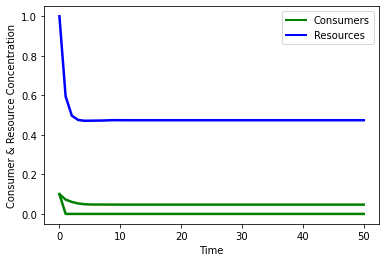

In [8]:
N = 2 # Number of consumers
M = 1 # Number of resources

result_array, rich_series, CUE_out, Ea_CUE_out, Sr = ass_temp_run(t_fin, N, M, T, Tref, Ma, ass, Ea_D, lf, p_value, typ, K, rho_R, rho_U)

plt.plot(t_plot, result_array[:,N:N+M], 'b-', linewidth=2.5, label = "Resources")
plt.plot(t_plot, result_array[:,0:N], 'g-', linewidth=2.5, label = "Consumers")
plt.ylabel('Consumer & Resource Concentration')
plt.xlabel('Time')
plt.legend([Line2D([0], [0], color='green', lw=2), Line2D([0], [0], color='blue', lw=2)], ['Consumers', 'Resources'])
plt.show()

#### 1 assembly

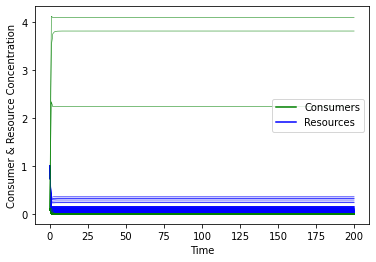

In [11]:
########## Setting Parameters ###########
N = 50 # Number of consumers
M = 100 # Number of resources

t_fin = 200 # Number of time steps

result_array, rich_series, CUE_out, Ea_CUE_out, Sr = ass_temp_run(t_fin, N, M, T, Tref, Ma, ass, Ea_D, lf, p_value, typ, K, rho_R, rho_U)

t_plot = np.linspace(0,len(result_array),len(result_array))

plt.plot(t_plot, result_array[:,N:N+M], 'b-', linewidth=0.5, label = "Resources")
plt.plot(t_plot, result_array[:,0:N], 'g-', linewidth=0.5, label = "Consumers")
plt.ylabel('Consumer & Resource Concentration')
plt.xlabel('Time')
plt.legend([Line2D([0], [0], color='green'), Line2D([0], [0], color='blue')], ['Consumers', 'Resources'])
plt.show()

#### Richness with Temperature

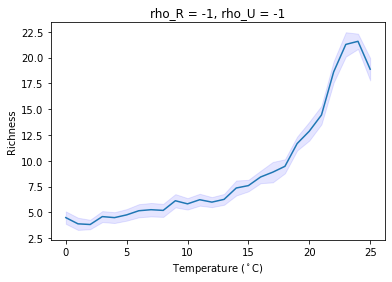

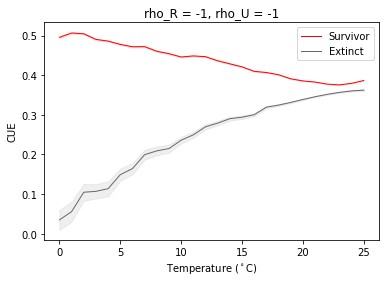

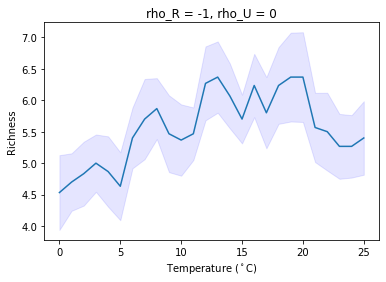

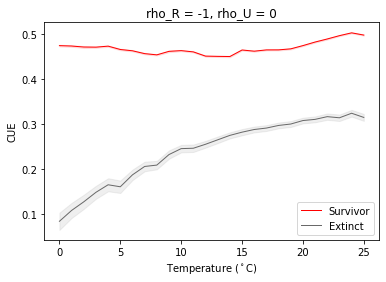

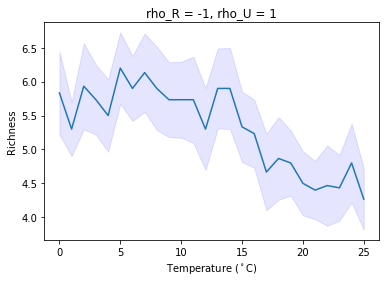

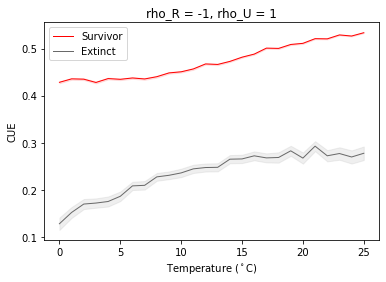

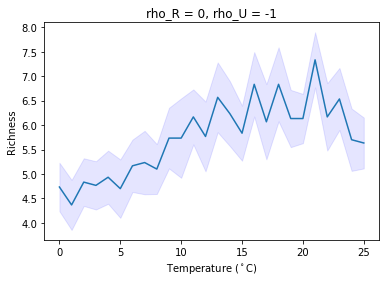

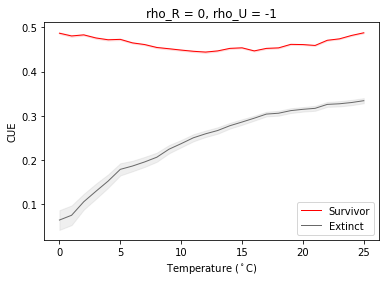

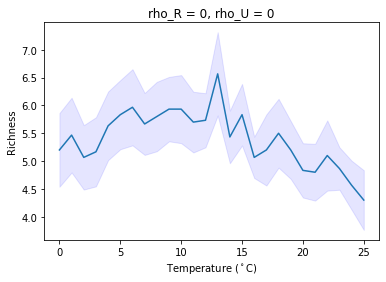

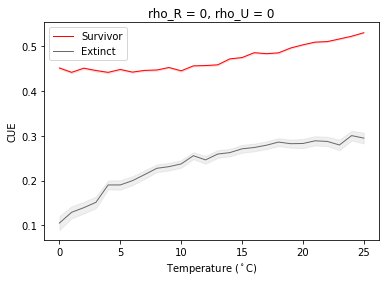

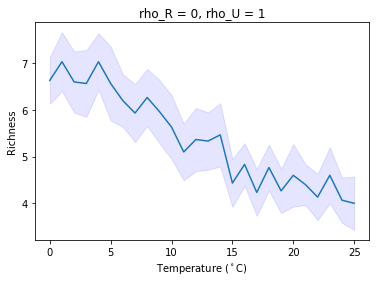

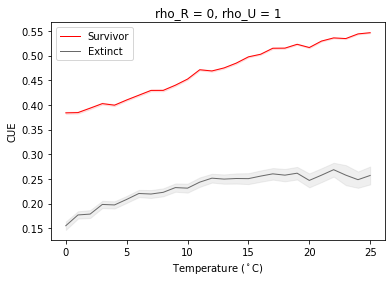

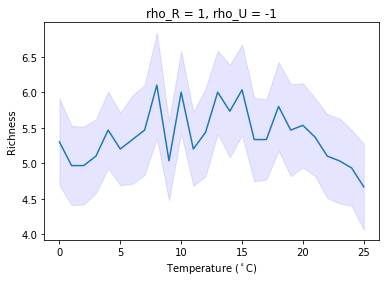

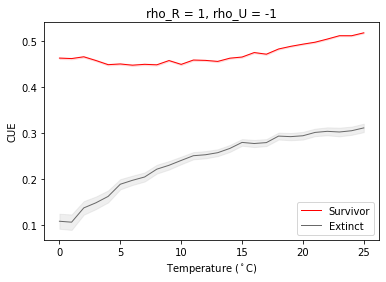

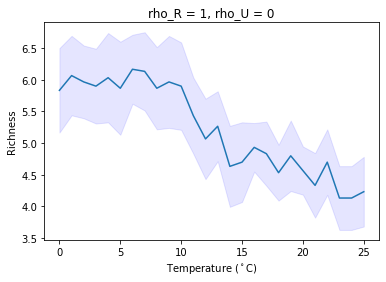

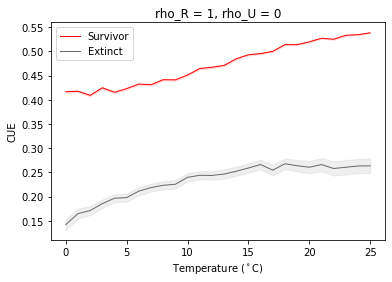

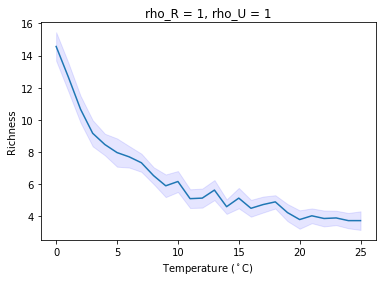

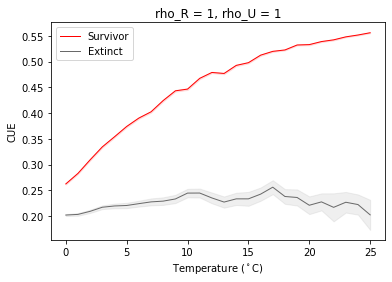

In [16]:
from Bacteria_vector_modular import ass_temp_run
import matplotlib.pylab as plt
import numpy as np

########## Setting Parameters ###########
N = 50 # Number of consumers
M = 100 # Number of resources

# Temperature params
Tref = 273.15 + 10 # Reference temperature Kelvin
Ma = 1 # Mass
Ea_D = 3.5 # Deactivation energy - only used if use Sharpe-Schoolfield temp-dependance
lf = 0.4 # Leakage
p_value = 1 # External input resource concentration

# covariance of B and Ea, abs(rho)<=1
for rho_R in [-1, 0, 1]:
    for rho_U in [-1, 0, 1]: 
        # Assembly
        ass = 30 # Assembly number, i.e. how many times the system can assemble
        t_fin = 2500 # Number of time steps
        typ = 1 # Functional response, Type I or II
        K = 5 # Half saturation constant

        T_c = 26 # How many temperatures to cover (how many cycles to run)

        ########## Running Model ###########
        rich = np.empty((0, ass))

        sur_CUE = []
        sur_Ea = []
        ext_CUE = []
        ext_Ea = []

        for i in range(T_c):
            T = 273.15 + i # Temperature
            result_array, rich_series, l, U_out_total, R_out, CUE_out, Ea_CUE_out, overlap, crossf, Sr = ass_temp_run(t_fin, N, M, T, Tref, Ma, ass, Ea_D, lf, p_value, typ, K, rho_R, rho_U)
            sur = [np.where(result_array[(i+1)*t_fin-1, 0:N]) for i in range(ass)]
            ext = [np.where(result_array[(i+1)*t_fin-1, 0:N] == 0) for i in range(ass)]
            sur_CUE.append(np.concatenate([CUE_out[i][sur[i]] for i in range(len(sur))]))
            ext_CUE.append(np.concatenate([CUE_out[i][ext[i]] for i in range(len(ext))]))

            rich = np.append(rich, [rich_series.flatten()], axis = 0)

        rich_mean = np.mean(rich, axis = 1)
        rich_ci =  1.96 * np.std(rich,axis = 1)/(T_c**0.5)

        T_plot = range(0, T_c, 1)

        CUE_mean = np.array([np.mean(sur_CUE[i]) for i in range(T_c)])
        CUE_ci = np.array([1.96 * np.std(sur_CUE[i])/(len(ext_CUE[i])**0.5) for i in range(T_c)])
        CUE_ext_mean = np.array([np.mean(ext_CUE[i]) for i in range(T_c)])
        CUE_ext_ci = np.array([1.96 * np.std(ext_CUE[i])/(len(ext_CUE[i])**0.5) for i in range(T_c)])

        plt.plot(T_plot, rich_mean)
        plt.fill_between(T_plot, rich_mean - rich_ci, rich_mean + rich_ci, color='b', alpha=.1)
        plt.xlabel('Temperature ($^\circ$C)')
        plt.ylabel('Richness')
        plt.title("rho_R = %d" %rho_R + ", rho_U = %d" %rho_U)
        plt. show()

        plt.plot(T_plot, CUE_mean, 'r', label = "Survivor",linewidth=1)
        plt.fill_between(T_plot, CUE_mean - CUE_ci, CUE_mean + CUE_ci, color='r', alpha=.1)
        plt.plot(T_plot, CUE_ext_mean, 'dimgrey', label = "Extinct",linewidth=1)
        plt.fill_between(T_plot,  CUE_ext_mean - CUE_ext_ci,  CUE_ext_mean + CUE_ext_ci, color='dimgrey', alpha=.1)
        plt.xlabel('Temperature ($^\circ$C)')
        plt.ylabel('CUE')
        plt.legend()
        plt.title("rho_R = %d" %rho_R + ", rho_U = %d" %rho_U)
        plt. show()

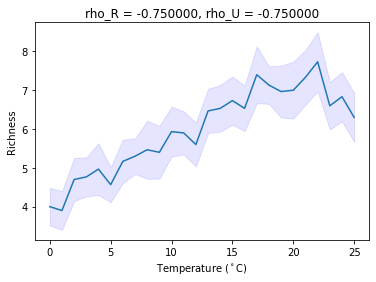

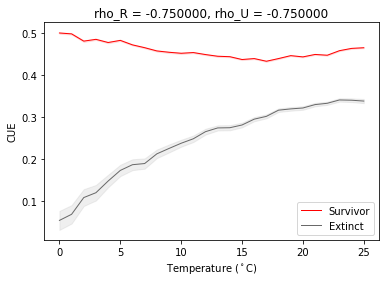

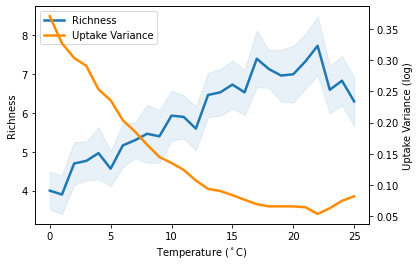

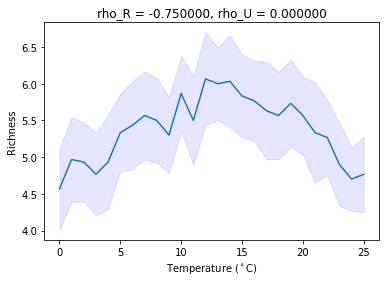

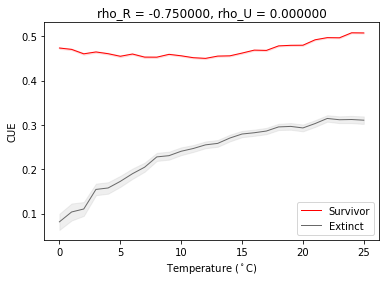

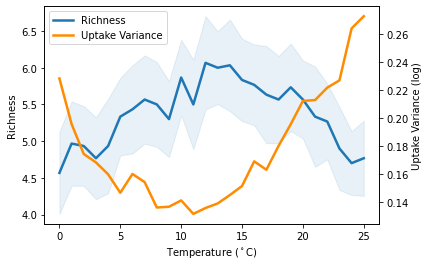

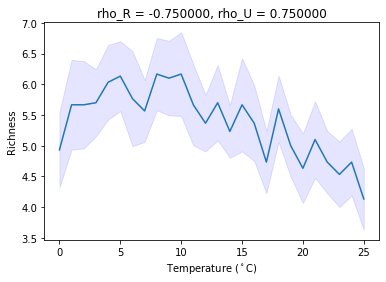

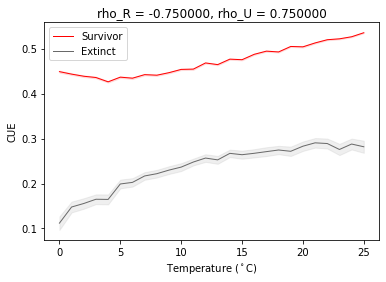

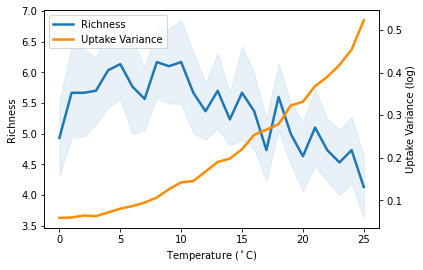

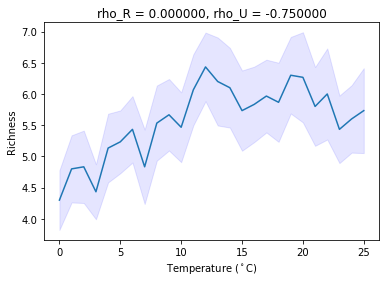

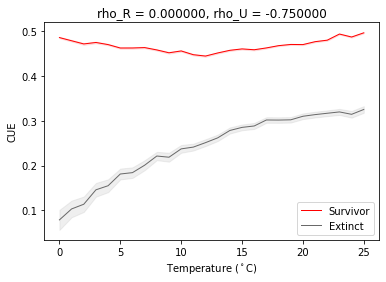

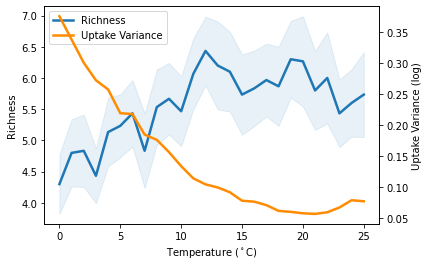

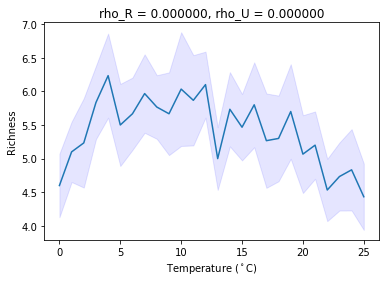

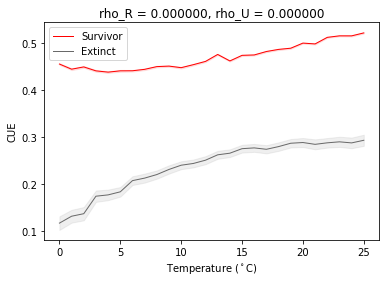

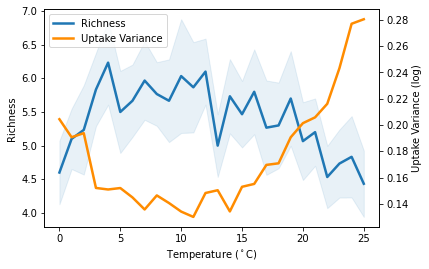

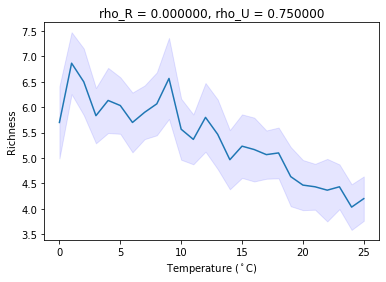

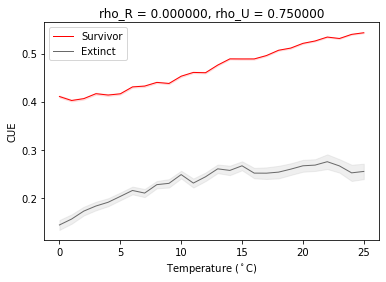

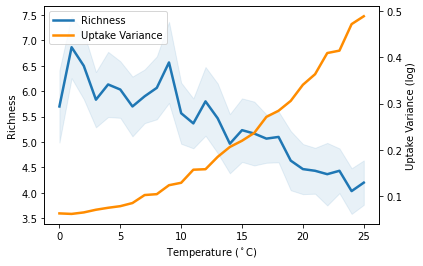

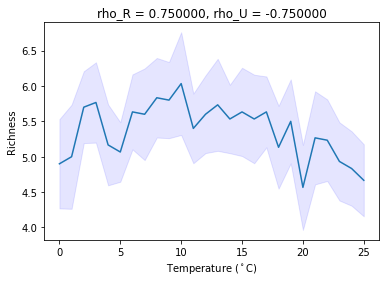

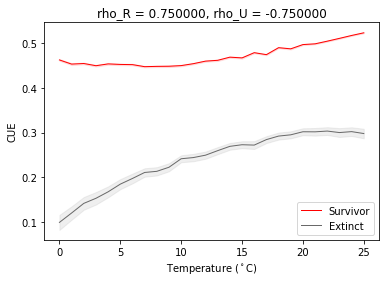

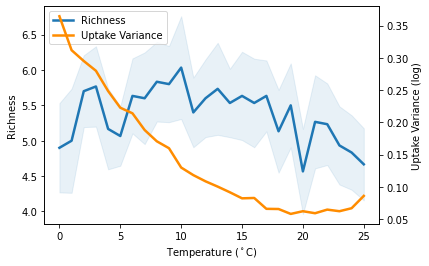

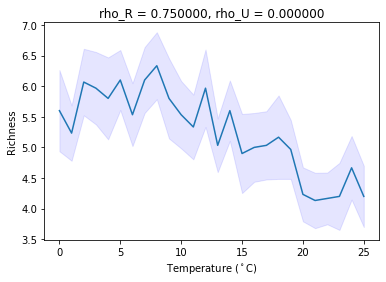

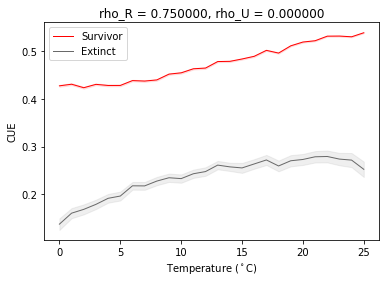

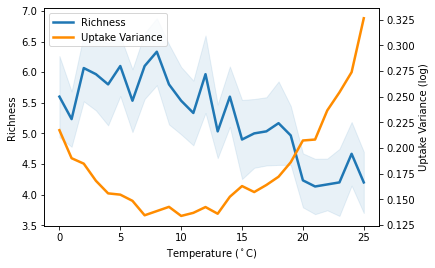

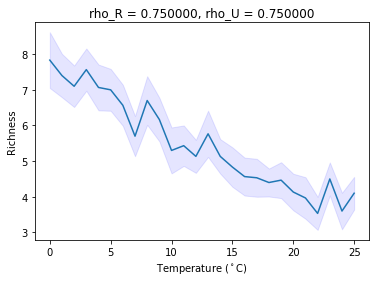

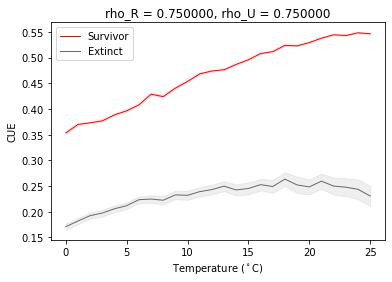

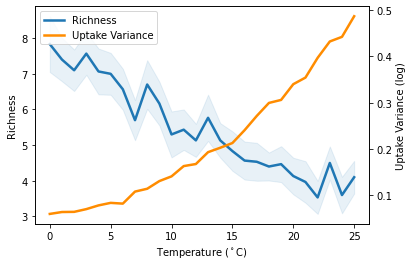

In [1]:
from Bacteria_vector_modular import ass_temp_run
import matplotlib.pylab as plt
import numpy as np

########## Setting Parameters ###########
N = 50 # Number of consumers
M = 100 # Number of resources

# Temperature params
Tref = 273.15 + 10 # Reference temperature Kelvin
Ma = 1 # Mass
Ea_D = 3.5 # Deactivation energy - only used if use Sharpe-Schoolfield temp-dependance
lf = 0.4 # Leakage
p_value = 1 # External input resource concentration


# covariance of B and Ea, abs(rho)<=1
for rho_R in [-0.75, 0, 0.75]:
    for rho_U in [-0.75, 0, 0.75]: 
        # Assembly
        ass = 30 # Assembly number, i.e. how many times the system can assemble
        t_fin = 2500 # Number of time steps
        typ = 1 # Functional response, Type I or II
        K = 5 # Half saturation constant

        T_c = 26 # How many temperatures to cover (how many cycles to run)

        ########## Running Model ###########
        rich = np.empty((0, ass))

        sur_CUE = []
        ext_CUE = []
        all_U = []
        all_R = []


        for i in range(T_c):
            T = 273.15 + i # Temperature
            result_array, rich_series, l, U_out_total, R_out, CUE_out, Ea_CUE_out, overlap, crossf, Sr = ass_temp_run(t_fin, N, M, T, Tref, Ma, ass, Ea_D, lf, p_value, typ, K, rho_R, rho_U)
            sur = [np.where(result_array[(i+1)*t_fin-1, 0:N]) for i in range(ass)]
            ext = [np.where(result_array[(i+1)*t_fin-1, 0:N] == 0) for i in range(ass)]
            sur_CUE.append(np.concatenate([CUE_out[i][sur[i]] for i in range(len(sur))]))
            ext_CUE.append(np.concatenate([CUE_out[i][ext[i]] for i in range(len(ext))]))
            all_U.append(np.concatenate([np.sum(U_out_total, axis = 1).reshape(ass, N)[i] for i in range(len(sur))]).ravel())
            all_R.append(np.concatenate([R_out[i] for i in range(len(ext))]).ravel())

            rich = np.append(rich, [rich_series.flatten()], axis = 0)

        rich_mean = np.mean(rich, axis = 1)
        rich_ci =  1.96 * np.std(rich,axis = 1)/(T_c**0.5)

        T_plot = range(0, T_c, 1)

        CUE_mean = np.array([np.mean(sur_CUE[i]) for i in range(T_c)])
        CUE_ci = np.array([1.96 * np.std(sur_CUE[i])/(len(ext_CUE[i])**0.5) for i in range(T_c)])
        CUE_ext_mean = np.array([np.mean(ext_CUE[i]) for i in range(T_c)])
        CUE_ext_ci = np.array([1.96 * np.std(ext_CUE[i])/(len(ext_CUE[i])**0.5) for i in range(T_c)])

        plt.plot(T_plot, rich_mean)
        plt.fill_between(T_plot, rich_mean - rich_ci, rich_mean + rich_ci, color='b', alpha=.1)
        plt.xlabel('Temperature ($^\circ$C)')
        plt.ylabel('Richness')
        plt.title("rho_R = %f" %rho_R + ", rho_U = %f" %rho_U)
        plt. show()

        plt.plot(T_plot, CUE_mean, 'r', label = "Survivor",linewidth=1)
        plt.fill_between(T_plot, CUE_mean - CUE_ci, CUE_mean + CUE_ci, color='r', alpha=.1)
        plt.plot(T_plot, CUE_ext_mean, 'dimgrey', label = "Extinct",linewidth=1)
        plt.fill_between(T_plot,  CUE_ext_mean - CUE_ext_ci,  CUE_ext_mean + CUE_ext_ci, color='dimgrey', alpha=.1)
        plt.xlabel('Temperature ($^\circ$C)')
        plt.ylabel('CUE')
        plt.legend()
        plt.title("rho_R = %f" %rho_R + ", rho_U = %f" %rho_U)
        plt. show()
        
        U_var = np.array([np.var(np.log(all_U[i])) for i in range(T_c)])

        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        ln1 = ax1.plot(T_plot, rich_mean,'C0', label = "Richness",linewidth=2.5)
        ax1.fill_between(T_plot, rich_mean - rich_ci, rich_mean + rich_ci, color='C0', alpha=.1)
        ln2 = ax2.plot(T_plot, U_var, 'darkorange', label = "Uptake Variance",linewidth=2.5)
        ax1.set_xlabel('Temperature ($^\circ$C)')
        ax1.set_ylabel('Richness')
        ax2.set_ylabel('Uptake Variance (log)')
        lns = ln1+ln2
        ax1.legend(lns, [i.get_label() for i in lns], loc = 2)
        plt. show()


## Negative Correlation

In [6]:
from Bacteria_vector_modular import ass_temp_run
import matplotlib.pylab as plt
import numpy as np
import scipy as sc
from scipy import stats

########## Setting Parameters ###########
N = 100 # Number of consumers
M = 50 # Number of resources

# Temperature params
Tref = 273.15 + 10 # Reference temperature Kelvin
Ma = 1 # Mass
Ea_D = 3.5 # Deactivation energy - only used if use Sharpe-Schoolfield temp-dependance
lf = 0.4 # Leakage
p_value = 1 # External input resource concentration
# covariance of B and Ea, abs(rho)<=1
rho_R = -1
rho_U = -1

# Assembly
ass = 50 # Assembly times at each temperature
t_fin = 4000 # Number of time steps for each temperature
typ = 1 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)
T_c = 26 # How many temperatures to cover (how many cycles to run)

rich = np.empty((0, ass))
eq = np.empty((0, ass))
eq_sur = np.empty((0, ass))
eq_sur_ci = np.empty((0, ass))
dEa = np.empty((0, ass))
dEa_sur = np.empty((0, ass))
dEa_sur_ci = np.empty((0, ass))
sU = []
sR = []
eU = []
eR = []
U_var = []
extU_var = []
sur_var = np.empty((0))
sur_var_ci = np.empty((0))
ext_var = np.empty((0))
ext_var_ci = np.empty((0))
all_Ea = np.empty((0))
all_Ea_ci = np.empty((0))
sur_CUE = []
sur_Ea = []
ext_CUE = []
ext_Ea = []
sur_Sr = []
all_Sr = np.empty((0))
sur_overlap = []
ext_overlap = []
sur_crossf = []
ext_crossf = []


for i in range(T_c):
    T = 273.15 + i # Temperature
    result_array, rich_series, l, U_out_total, R_out, CUE_out, Ea_CUE_out, overlap, crossf, Sr = ass_temp_run(t_fin, N, M, T, Tref, Ma, ass, Ea_D, lf, p_value, typ, K, rho_R, rho_U)
    rich = np.append(rich, [rich_series.flatten()], axis = 0)
    
    sur = [np.where(result_array[(i+1)*t_fin-1, 0:N]) for i in range(ass)]
    ext = [np.where(result_array[(i+1)*t_fin-1, 0:N] == 0) for i in range(ass)]
    
    sU.append(np.concatenate([np.sum(U_out_total, axis = 1).reshape(ass, N)[i][sur[i]] for i in range(len(sur))]).ravel())
    sR.append(np.concatenate([R_out[i][sur[i]] for i in range(len(sur))]).ravel())
    eU.append(np.concatenate([np.sum(U_out_total, axis = 1).reshape(ass, N)[i][ext[i]] for i in range(len(ext))]).ravel())
    eR.append(np.concatenate([R_out[i][ext[i]] for i in range(len(ext))]).ravel())
    U_var.append(np.concatenate([np.var(U_out_total,axis = 1).reshape(ass, N)[i][sur[i]] for i in range(len(sur))]).ravel())
    extU_var.append(np.concatenate([np.var(U_out_total,axis = 1).reshape(ass, N)[i][ext[i]] for i in range(len(ext))]).ravel())
        
    sur_CUE.append(np.concatenate([CUE_out[i][sur[i]] for i in range(len(sur))]))
    sur_var = np.append(sur_var, [np.nanmean([np.var(CUE_out[i][sur[i]]) for i in range(len(sur))])])
    sur_var_ci = np.append(sur_var_ci, [1.96 * np.nanstd([np.var(CUE_out[i][sur[i]]) for i in range(len(sur))])/(np.sum(rich_series)**0.5)])
    sur_Ea.append(np.concatenate([Ea_CUE_out[i][sur[i]] for i in range(len(sur))]))
    ext_CUE.append(np.concatenate([CUE_out[i][ext[i]] for i in range(len(ext))]))
    ext_Ea.append(np.concatenate([Ea_CUE_out[i][ext[i]] for i in range(len(ext))]))
    ext_var = np.append(ext_var, [np.mean([np.var(CUE_out[i][ext[i]]) for i in range(len(ext))])])
    ext_var_ci = np.append(ext_var_ci, [1.96 * np.std([np.var(CUE_out[i][ext[i]]) for i in range(len(ext))])/(np.sum(N-rich_series)**0.5)])
    
    sur_Sr.append(np.concatenate([Sr[i][sur[i]] for i in range(len(sur))]))
    all_Sr = np.append(all_Sr, [np.mean(Sr)])
    
    eq_sur = np.append(eq_sur, [np.array([np.mean(np.abs(Sr[i][sur[i]] - np.mean(Sr,axis=1)[i])) for i in range (ass)])], axis = 0)
    eq_sur_ci = np.append(eq_sur_ci, [np.array([1.96*np.std(np.abs(Sr[i][sur[i]] - np.mean(Sr,axis=1)[i]))/(len(sur[i])**0.5) for i in range (ass)])],axis =0)
    eq = np.append(eq, [np.mean([np.abs(Sr[i,:] - np.mean(Sr,axis=1)[i]) for i in range (ass)], axis = 1)], axis= 0)

    all_Ea = np.append(all_Ea, [np.mean(Ea_CUE_out)])
    all_Ea_ci = np.append(all_Ea_ci, [1.96 * np.std(Ea_CUE_out)/((ass*N)**0.5)])
    dEa_sur = np.append(dEa_sur, [np.array([np.mean(np.abs(Ea_CUE_out[i][sur[i]] - np.mean(Ea_CUE_out,axis=1)[i])) for i in range (ass)])], axis = 0)
    dEa_sur_ci = np.append(dEa_sur_ci, [np.array([1.96*np.std(np.abs(Ea_CUE_out[i][sur[i]] - np.mean(Ea_CUE_out,axis=1)[i]))/(len(sur[i])**0.5) for i in range (ass)])],axis =0)
    dEa = np.append(dEa, [np.mean([np.abs(Ea_CUE_out[i,:] - np.mean(Ea_CUE_out,axis=1)[i]) for i in range (ass)], axis = 1)], axis= 0)
    
    sur_overlap.append(np.concatenate([overlap[i][sur[i]] for i in range(len(sur))]))
    ext_overlap.append(np.concatenate([overlap[i][ext[i]] for i in range(len(ext))]))
    
    sur_crossf.append(np.concatenate([crossf[i][sur[i]] for i in range(len(sur))]))
    ext_crossf.append(np.concatenate([crossf[i][ext[i]] for i in range(len(ext))]))
    

rich_mean = np.nanmean(rich, axis = 1)
rich_ci =  1.96 * np.nanstd(rich,axis = 1)/(ass**0.5)

CUE_mean = np.array([np.mean(sur_CUE[i]) for i in range(T_c)])
CUE_ci = np.array([1.96 * np.std(sur_CUE[i])/(len(ext_CUE[i])**0.5) for i in range(T_c)])
CUE_ext_mean = np.array([np.mean(ext_CUE[i]) for i in range(T_c)])
CUE_ext_ci = np.array([1.96 * np.std(ext_CUE[i])/(len(ext_CUE[i])**0.5) for i in range(T_c)])

Ea_mean = np.array([np.mean(sur_Ea[i]) for i in range(T_c)])
Ea_ci = np.array([1.96 * np.std(sur_Ea[i])/(len(sur_Ea[i])**0.5) for i in range(T_c)])

Sr_mean = np.array([np.mean(sur_Sr[i]) for i in range(T_c)])
Sr_ci = np.array([1.96 * np.std(sur_Sr[i])/(len(sur_Sr[i])**0.5) for i in range(T_c)])

sU_mean = np.array([np.mean(sU[i]) for i in range(T_c)])
sU_ci = np.array([1.96 * np.std(sU[i])/(len(sU[i])**0.5) for i in range(T_c)])
sR_mean = np.array([np.mean(sR[i]) for i in range(T_c)])
sR_ci = np.array([1.96 * np.std(sR[i])/(len(sR[i])**0.5) for i in range(T_c)])

U_var_mean = np.array([np.mean(U_var[i]) for i in range(T_c)])
U_var_ci = np.array([1.96 * np.std(U_var[i])/(len(U_var[i])**0.5) for i in range(T_c)])
extU_var_mean = np.array([np.mean(extU_var[i]) for i in range(T_c)])
extU_var_ci = np.array([1.96 * np.std(extU_var[i])/(len(extU_var[i])**0.5) for i in range(T_c)])

eU_mean = np.array([np.mean(eU[i]) for i in range(T_c)])
eU_ci = np.array([1.96 * np.std(eU[i])/(len(eU[i])**0.5) for i in range(T_c)])
eR_mean = np.array([np.mean(eR[i]) for i in range(T_c)])
eR_ci = np.array([1.96 * np.std(eR[i])/(len(eR[i])**0.5) for i in range(T_c)])

rich_sur = [[np.repeat(rich[i][j], rich[i][j]) for j in range(ass)] for i in range(T_c)]
rich_ext = [[np.repeat(rich[i][j], N - rich[i][j]) for j in range(ass)] for i in range(T_c)]

overlap_sur_mean = np.array([np.mean(sur_overlap[i]) for i in range(T_c)])
overlap_sur_ci = np.array([1.96 * np.std(sur_overlap[i])/(len(sur_overlap[i])**0.5) for i in range(T_c)])
overlap_ext_mean = np.array([np.mean(ext_overlap[i]) for i in range(T_c)])
overlap_ext_ci = np.array([1.96 * np.std(ext_overlap[i])/(len(ext_overlap[i])**0.5) for i in range(T_c)])

crossf_sur_mean = np.array([np.mean(sur_crossf[i]) for i in range(T_c)])
crossf_sur_ci = np.array([1.96 * np.std(sur_overlap[i])/(len(sur_overlap[i])**0.5) for i in range(T_c)])
crossf_ext_mean = np.array([np.mean(ext_crossf[i]) for i in range(T_c)])
crossf_ext_ci = np.array([1.96 * np.std(ext_overlap[i])/(len(ext_overlap[i])**0.5) for i in range(T_c)])

surEa_mean = np.array([np.mean(sur_Ea[i]) for i in range(T_c)])
surEa_ci = np.array([1.96 * np.std(sur_Ea[i])/(len(sur_Ea[i])**0.5) for i in range(T_c)])

Ea = []
Ea_e = []
for i in range(T_c): 
    n = 0
    for j in rich[i]:
        j = int(j)
        Ea.append(sur_Ea[i][n:n+j])
        Ea_e.append(ext_Ea[i][n:n+j])
        n = n + j

A = list(zip(rich.flatten(),Ea))
B = list(zip(rich.flatten(),Ea_e))
A.sort(key = lambda x: x[0])
B.sort(key = lambda x: x[0])

rich_v = []
for x in rich.flatten():
    if x not in rich_v:
        rich_v.append(x)
rich_v = np.sort(rich_v)


Ea_sorted = []
Ea_e_sorted = []
for i in rich_v:
    sorting = np.empty((0))
    sorting_e = np.empty((0))
    for j in range(len(A)):
        if [x[0] for x in A][j] == i:
            sorting = np.append(sorting, A[j][1])
            sorting_e = np.append(sorting_e, B[j][1])
    Ea_sorted.append(sorting)
    Ea_e_sorted.append(sorting_e)

    
meanEa = []
ciEa = []
meanEa_e = []
ciEa_e = []
for i in range(len(Ea_sorted)):
    meanEa.append(np.mean(Ea_sorted[i]))
    ciEa.append(1.96 * np.std(Ea_sorted[i])/(len(Ea_sorted[i])**0.5))
    meanEa_e.append(np.mean(Ea_e_sorted[i][np.where(Ea_e_sorted[i]>-500)]))
    ciEa_e.append(1.96 * np.std(Ea_e_sorted[i][np.where(Ea_e_sorted[i]>-500)])/(len(Ea_e_sorted[i][np.where(Ea_e_sorted[i]>-500)])**0.5))

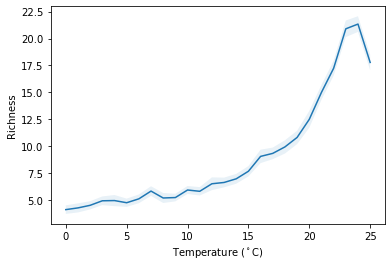

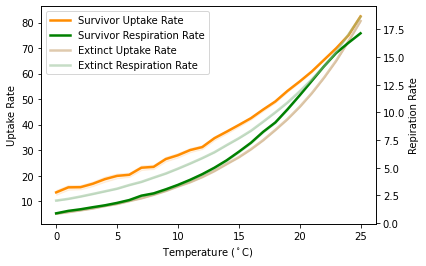

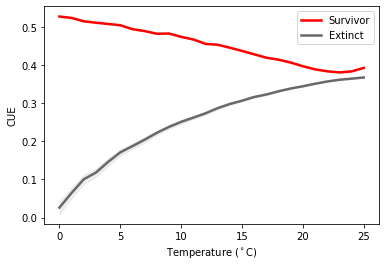

In [7]:
T_plot = range(0, T_c, 1)
T_sur = [[np.repeat(T_plot[i], rich[i][j]) for j in range(ass)] for i in range(T_c)]


plt.plot(T_plot, rich_mean)
plt.fill_between(T_plot, rich_mean - rich_ci, rich_mean + rich_ci, alpha=0.1, linewidth=2.5)
plt.xlabel('Temperature ($^\circ$C)')
plt.ylabel('Richness')
plt. show()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ln1 = ax1.plot(T_plot, sU_mean,'darkorange', label = "Survivor Uptake Rate",linewidth=2.5)
ax1.fill_between(T_plot, sU_mean - sU_ci, sU_mean + sU_ci, color='darkorange', alpha=.1)
ln3 = ax1.plot(T_plot, eU_mean,'tan', label = "Extinct Uptake Rate", alpha=.7,linewidth=2.5)
ax1.fill_between(T_plot, eU_mean - eU_ci, eU_mean + eU_ci, color='tan', alpha=.3)
ln2 = ax2.plot(T_plot, sR_mean, 'g', label = "Survivor Respiration Rate",linewidth=2.5)
ax2.fill_between(T_plot, sR_mean - sR_ci, sR_mean + sR_ci, color='g', alpha=.1)
ln4 = ax2.plot(T_plot, eR_mean, 'darkseagreen', label = "Extinct Respiration Rate", alpha=.5,linewidth=2.5)
ax2.fill_between(T_plot, eR_mean - eR_ci, eR_mean + eR_ci, color='darkseagreen', alpha=.1)
ax1.set_xlabel('Temperature ($^\circ$C)')
ax1.set_ylabel('Uptake Rate')
ax2.set_ylabel('Repiration Rate')
lns = ln1+ln2+ln3+ln4
ax1.legend(lns, [i.get_label() for i in lns], loc = 2)
plt. show()

plt.plot(T_plot, CUE_mean, 'r', label = "Survivor",linewidth=2.5)
plt.fill_between(T_plot, CUE_mean - CUE_ci, CUE_mean + CUE_ci, color='r', alpha=.1)
plt.plot(T_plot, CUE_ext_mean, 'dimgrey', label = "Extinct",linewidth=2.5)
plt.fill_between(T_plot,  CUE_ext_mean - CUE_ext_ci,  CUE_ext_mean + CUE_ext_ci, color='dimgrey', alpha=.1)
plt.xlabel('Temperature ($^\circ$C)')
plt.ylabel('CUE')
plt.legend()
plt. show()

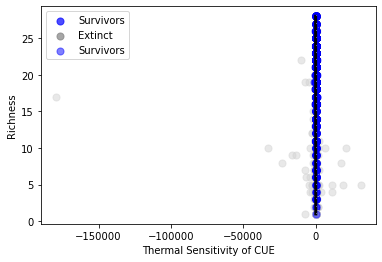

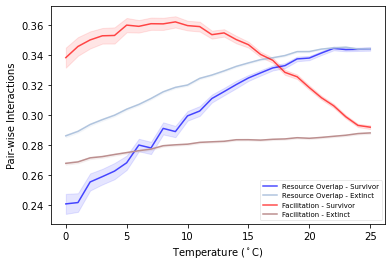

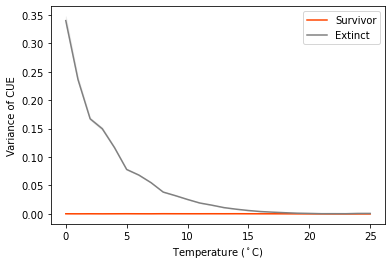

[3.13900121e-04 2.39237618e-04 3.10871663e-04 2.35359799e-04
 3.12853682e-04 3.89015681e-04 3.12500247e-04 2.86139660e-04
 4.23063802e-04 3.67113721e-04 3.50391474e-04 3.42561979e-04
 3.84852806e-04 3.52937407e-04 4.15412263e-04 3.31302050e-04
 2.89719420e-04 2.92814591e-04 2.52146362e-04 2.01220504e-04
 1.71845786e-04 1.32326346e-04 7.48292354e-05 4.00517169e-05
 3.91674750e-05 5.51592783e-05]


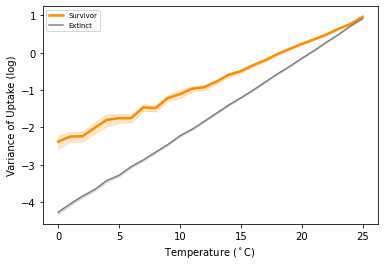

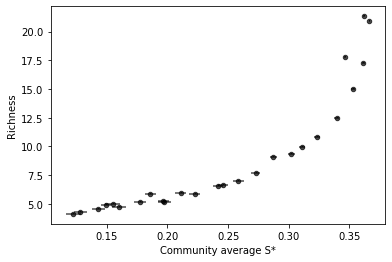

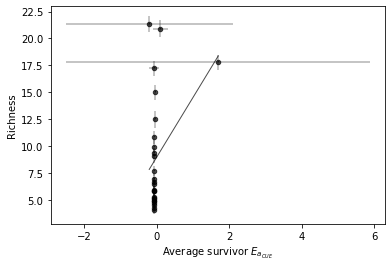

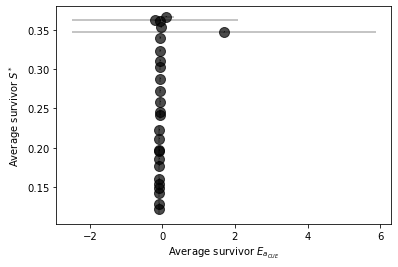

In [8]:
plt.scatter(meanEa, rich_v, color = 'b', alpha = 0.7, s = 50, label = 'Survivors')
plt.errorbar(meanEa, rich_v, xerr=ciEa, fmt=',', color = 'b', alpha = 0.7)
plt.scatter(meanEa_e, rich_v, color = 'grey', alpha = 0.7, s = 50, label = 'Extinct')
plt.errorbar(meanEa_e, rich_v, xerr=ciEa_e, fmt=',', color = 'grey', alpha = 0.7)

n = 0
for i in range(T_c):
    plt.scatter(ext_Ea[i], np.concatenate(rich_ext[i]), color = 'lightgrey', alpha = 0.5, s = 50)
    if n == 0: 
        plt.scatter(sur_Ea[i], np.concatenate(rich_sur[i]), color = 'b', alpha = 0.5, s =50, label = 'Survivors')
        n = 1
    else:
        plt.scatter(sur_Ea[i], np.concatenate(rich_sur[i]), color = 'b', alpha = 0.5, s = 50)
m, b = np.polyfit(np.delete(meanEa,np.where(np.isnan(meanEa))), np.delete(rich_v,np.where(np.isnan(meanEa))), 1)
x = np.arange((np.max(rich_v)-b)/m, (np.min(rich_v)-b)/m, 0.01)
plt.plot(x, m*x + b, color = 'k',linewidth=3)
# plt.text(0.7, 12.5, '$R^2 = $%s' %np.round(r_value**2, 3), fontsize = 22)
plt.xlabel('Thermal Sensitivity of CUE')
plt.ylabel('Richness')
plt.legend()
plt.show()


plt.plot(T_plot, overlap_sur_mean, color = 'b', alpha = 0.7, label = 'Resource Overlap - Survivor')
plt.plot(T_plot, overlap_ext_mean, color = 'lightsteelblue', label = 'Resource Overlap - Extinct')
plt.fill_between(T_plot, overlap_sur_mean - overlap_sur_ci, overlap_sur_mean + overlap_sur_ci, color = 'b', alpha=.1)
plt.fill_between(T_plot, overlap_ext_mean - overlap_ext_ci, overlap_ext_mean + overlap_ext_ci, color = 'lightsteelblue', alpha=.1)
plt.plot(T_plot, crossf_sur_mean, color = 'r', alpha = 0.7, label = 'Facilitation - Survivor')
plt.plot(T_plot, crossf_ext_mean, color = 'rosybrown', label = 'Facilitation - Extinct')
plt.fill_between(T_plot, crossf_sur_mean - crossf_sur_ci, crossf_sur_mean + crossf_sur_ci, color = 'r', alpha=.1)
plt.fill_between(T_plot, crossf_ext_mean - crossf_ext_ci, crossf_ext_mean + crossf_ext_ci, color = 'rosybrown', alpha=.1)
plt.xlabel('Temperature ($^\circ$C)')
plt.ylabel('Pair-wise Interactions')
plt.legend(fontsize = 'x-small', framealpha = 0.4)
plt.show()


plt.plot(T_plot, sur_var,'orangered', label = "Survivor")
plt.fill_between(T_plot, sur_var - sur_var_ci, sur_var + sur_var_ci, color='orangered', alpha=.1)
plt.plot(T_plot, ext_var,'grey', label = "Extinct")
plt.fill_between(T_plot, ext_var - ext_var_ci, ext_var + ext_var_ci, color='grey', alpha=.1)
plt.xlabel('Temperature ($^\circ$C)')
plt.ylabel('Variance of CUE')
plt.legend()
plt.show()
print(sur_var)

plt.plot(T_plot, np.log(U_var_mean),'darkorange', label = "Survivor",linewidth=2.5)
plt.fill_between(T_plot, np.log(U_var_mean-U_var_ci), np.log(U_var_mean+U_var_ci), color='darkorange', alpha=.2)
plt.plot(T_plot, np.log(extU_var_mean),'grey', label = "Extinct")
plt.fill_between(T_plot, np.log(extU_var_mean-extU_var_ci), np.log(extU_var_mean+extU_var_ci), color='grey', alpha=.2)
plt.xlabel('Temperature ($^\circ$C)')
plt.ylabel('Variance of Uptake (log)')
plt.legend(loc = 2,fontsize = 'x-small')
plt.show()

plt.scatter(Sr_mean, rich_mean, s=20, color = 'k', alpha = 0.7)
plt.errorbar(Sr_mean, rich_mean, xerr=Sr_ci, fmt=',', color = 'k', alpha = 0.7)
plt.xlabel('Community average S*')
plt.ylabel('Richness')
plt.show()


eq_mean = np.nanmean(eq_sur, axis = 1)
eq_ci =  1.96 * np.nanstd(eq_sur,axis = 1)/(ass**0.5)

m, b, r_value, p_value, std_err = sc.stats.linregress(surEa_mean, rich_mean)
# print(r_value**2)
x = np.arange(np.min(surEa_mean), np.max(surEa_mean), 0.001)
plt.plot(x, m*x + b, color = 'k',linewidth=1, alpha = 0.7)
plt.scatter(surEa_mean, rich_mean, s=20, color = 'k', alpha = 0.7)
plt.errorbar(surEa_mean, rich_mean, xerr=surEa_ci, fmt=',', color = 'k', alpha = 0.3)
plt.errorbar(surEa_mean, rich_mean, yerr=rich_ci, fmt=',', color = 'k', alpha = 0.3)
plt.xlabel('Average survivor $E_{a_{CUE}}$')
plt.ylabel('Richness')
plt.show()


plt.scatter(surEa_mean, Sr_mean, s=100, color = 'k', alpha = 0.7)
plt.errorbar(surEa_mean, Sr_mean, xerr=surEa_ci, fmt=',', color = 'k', alpha = 0.3)
plt.errorbar(surEa_mean, Sr_mean, yerr=Sr_ci, fmt=',', color = 'k', alpha = 0.3)
plt.xlabel('Average survivor $E_{a_{CUE}}$')
plt.ylabel('Average survivor $S^*$')
plt.show()


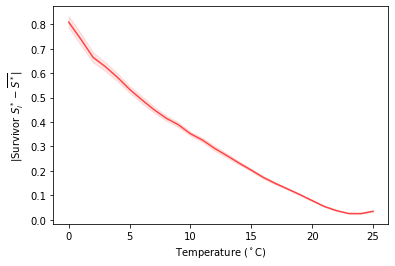

In [9]:
plt.plot(T_plot, eq_mean, 'r', label = 'Competitive exclusion', alpha = 0.7)
plt.fill_between(T_plot, eq_mean - eq_ci, eq_mean + eq_ci, color='r', alpha=.1)
plt.xlabel('Temperature ($^\circ$C)')
plt.ylabel('|Survivor $S_i^* - \overline{S^*}$|')
plt.show()